# Projet Deep Learning

## Imports

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import json
import pandas as pd

In [2]:
# V√©rifier la version de TensorFlow
print("TensorFlow version:", tf.__version__)

# T√©l√©chargement et extraction des donn√©es
data_dir = 'Fish.v1-416x416.tensorflow'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

# Analyse exploratoire des donn√©es (EDA)
num_train_images = len(os.listdir(train_dir))
num_test_images = len(os.listdir(test_dir))
num_valid_images = len(os.listdir(valid_dir))

print("Nombre d'images dans le dossier d'entra√Ænement:", num_train_images)
print("Nombre d'images dans le dossier de test:", num_test_images)
print("Nombre d'images dans le dossier de validation:", num_valid_images)


TensorFlow version: 2.15.0
Nombre d'images dans le dossier d'entra√Ænement: 945
Nombre d'images dans le dossier de test: 137
Nombre d'images dans le dossier de validation: 271


Exemples d'images dans le dossier d'entra√Ænement:


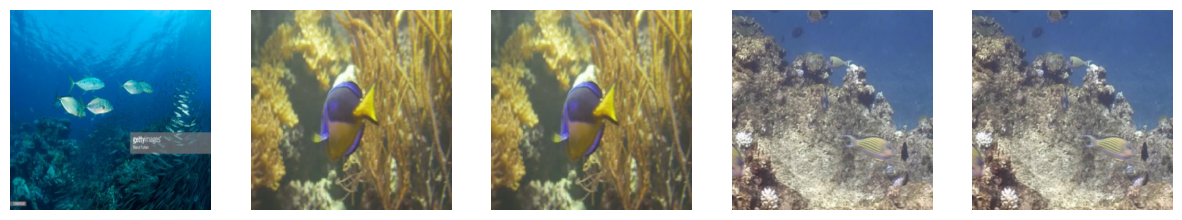

Exemples d'images dans le dossier de test:


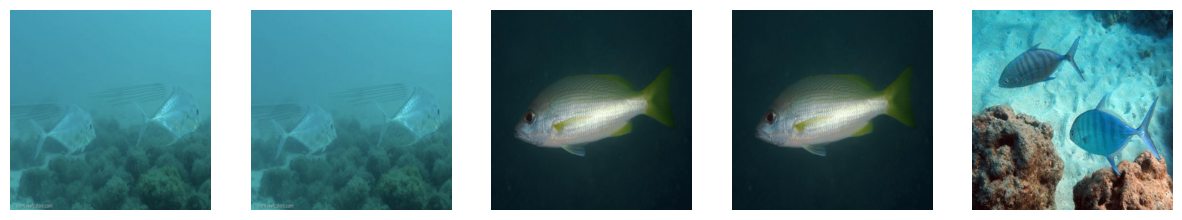

Exemples d'images dans le dossier de validation:


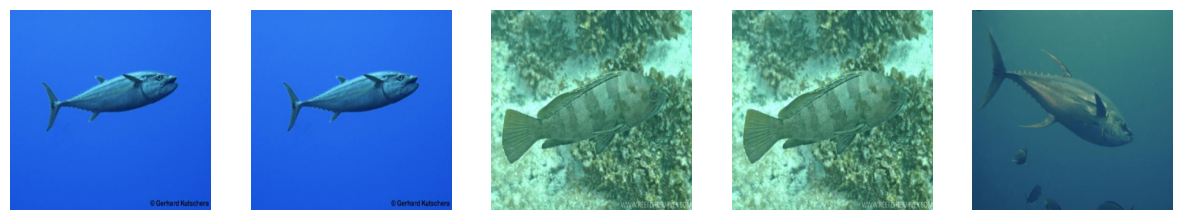

In [3]:
def display_images(directory, num_images=5):
    images = os.listdir(directory)
    num_images = min(num_images, len(images))

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        img_path = os.path.join(directory, images[i])
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

# Afficher des exemples d'images pour chaque ensemble de donn√©es
print("Exemples d'images dans le dossier d'entra√Ænement:")
display_images(train_dir)

print("Exemples d'images dans le dossier de test:")
display_images(test_dir)

print("Exemples d'images dans le dossier de validation:")
display_images(valid_dir)


## 1. Classification

In [4]:
def crop_images(initial_directory, destination):
    # Charger les annotations √† partir du fichier CSV
    annotations_file = '_annotations.csv'
    annotations_df = pd.read_csv(os.path.join(initial_directory, annotations_file))

    # Parcourir les annotations
    for index, row in annotations_df.iterrows():
        # Charger l'image correspondante
        image_path = os.path.join(initial_directory, row['filename'])
        image = cv2.imread(image_path)

        # V√©rifier si l'image a √©t√© charg√©e avec succ√®s
        if image is None:
            print(f"Impossible de charger l'image: {image_path}")
            continue

        # R√©cup√©rer les coordonn√©es du rectangle annot√©
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])

        # Cropper l'image selon le rectangle annot√©
        cropped_image = image[ymin:ymax, xmin:xmax]

        # V√©rifier si l'image cropp√©e est valide
        if cropped_image.size == 0 or cropped_image.shape[0] == 0 or cropped_image.shape[1] == 0:
            print(f"Image cropp√©e invalide pour l'image: {image_path}")
            continue

        # Trouver la classe annot√©e (l'esp√®ce de poisson)
        class_name = row['class']

        # Pr√©parer le dossier de sauvegarde
        save_dir = os.path.join(destination, class_name)
        os.makedirs(save_dir, exist_ok=True)

        # Construire un nom de fichier unique pour √©viter les √©crasements
        base_filename, file_extension = os.path.splitext(row['filename'])
        unique_filename = f"{base_filename}_{index}{file_extension}"
        save_path = os.path.join(save_dir, unique_filename)

        # Sauvegarder l'image cropp√©e
        cv2.imwrite(save_path, cropped_image)
        print(f"Image cropp√©e et sauvegard√©e: {save_path}")

crop_images(train_dir, "cropped_train_images")
crop_images(test_dir, "cropped_test_images")
crop_images(valid_dir, "cropped_valid_images")

Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset232_png.rf.CC8AfGJBFvbo9JTlNPe4_0.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset232_png.rf.CC8AfGJBFvbo9JTlNPe4_1.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_2.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_3.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_4.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_5.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_6.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_7.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset383_png.rf.CUvJtiM0i6cxxYjUVUN3_8.jpg
Image cropp√©

Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset456_png.rf.EzDQjmWIBHTciFiO16Lz_122.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset456_png.rf.EzDQjmWIBHTciFiO16Lz_123.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset456_png.rf.EzDQjmWIBHTciFiO16Lz_124.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset456_png.rf.EzDQjmWIBHTciFiO16Lz_125.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset456_png.rf.EzDQjmWIBHTciFiO16Lz_126.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset336_png.rf.EYwuGKXny6h4FcjZKWhD_127.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset142_png.rf.GV3BKeEHs6YjVNO8CnxY_128.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset142_png.rf.GV3BKeEHs6YjVNO8CnxY_129.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset361_png.rf.GeKFhRLOFK9rv3HD5TAx_

Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset77_png.rf.JmpA25E3lPniKDxA7rHp_222.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset77_png.rf.JmpA25E3lPniKDxA7rHp_223.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset77_png.rf.JmpA25E3lPniKDxA7rHp_224.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset77_png.rf.JmpA25E3lPniKDxA7rHp_225.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset77_png.rf.JmpA25E3lPniKDxA7rHp_226.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset502_png.rf.MArLiYj0DeA21qwtHlU3_227.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset91_png.rf.M8H8EikwNpjBciKmvHRk_228.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset177_png.rf.MWGjnMYi76P7MRg3p04i_229.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset552_png.rf.LaZMBGlPWCaebzxTvedT_230.jpg
I

Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_337.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_338.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_339.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_340.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_341.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset180_png.rf.RHp1qCqxBrKxQzOOqjwv_342.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset305_png.rf.NPRu0woZcToW8RjVKyZX_343.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset192_png.rf.TIR0qqw2yhDHjx02hHNF_344.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset29_png.rf.TH77nCqIkAUqcKHyqkvC_345.

Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset693_png.rf.ad5115ac805cab9e20fa9f162c51f30a_461.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset724_png.rf.aHmcePCx3B7GLA4U7xFz_462.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset724_png.rf.aHmcePCx3B7GLA4U7xFz_463.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Serranidae -Groupers-\FishDataset438_png.rf.ae83d928e3308409c557d0e79ba8f1d8_464.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Serranidae -Groupers-\FishDataset438_png.rf.ae83d928e3308409c557d0e79ba8f1d8_465.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset578_png.rf.ac932a9829f0da925af276150667a00b_466.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset242_png.rf.ac54bc26f0d71b21d423ab6578a63064_467.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset521_png.rf.aLJQfFliOdrrQgyeZJ

Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset566_png.rf.0445a5635ecbab50473007549cb1a20a_580.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset467_png.rf.0657a8dc93e73c230e8b5333a1da976c_581.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset527_png.rf.080e57a99e04881339cd1cfdba474326_582.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Serranidae -Groupers-\FishDataset504_png.rf.023775ccde4deacfeafeafc17c0df47d_583.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset261_png.rf.03D6OPlSMmhbr1GmvRt2_584.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset605_png.rf.07dc4fc11571861474a718d348b02c1f_585.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset276_png.rf.0CddukOXpSD6JgQchM2P_586.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset671_png.rf

Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset86_png.rf.1ijEUPumJNX0Db6BdUBd_702.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset175_png.rf.248f7b1f975ec6faf553f95ac54fd226_703.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset306_png.rf.22ceb688f83b4047926daca363391760_704.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset232_png.rf.1d5c88e43e6459f8d93d59742eebd90d_705.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset232_png.rf.1d5c88e43e6459f8d93d59742eebd90d_706.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset190_png.rf.20ef56d523f83355d3e8089866991e91_707.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset237_png.rf.233ac1dc267416e6d2d9718c3ffff240_708.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -J

Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset639_png.rf.t1wHetxtTV1MBDOWqT0S_815.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset52_png.rf.s4xKjMm6YOlRySzZ1N8U_816.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset52_png.rf.s4xKjMm6YOlRySzZ1N8U_817.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset478_png.rf.s6xS3KeD3QoMHyEuGkyL_818.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset107_png.rf.qHQuG46KB83g00098MDd_819.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset627_png.rf.tAgnCCl69IPkidBLMIVe_820.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset295_png.rf.ryF3X4uXSwqfD69rdGhr_821.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset566_png.rf.tFhvZ6IKxXYPMPSyF8IA_822.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\tuna\FishDataset185_png.rf.uIC4T1d6zcOgJatkXNs0_823.jpg
Image c

Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset383_png.rf.3a4afcc37f80ac2d10609bdf3efb94f4_930.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset383_png.rf.3a4afcc37f80ac2d10609bdf3efb94f4_931.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset383_png.rf.3a4afcc37f80ac2d10609bdf3efb94f4_932.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset383_png.rf.3a4afcc37f80ac2d10609bdf3efb94f4_933.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset383_png.rf.3a4afcc37f80ac2d10609bdf3efb94f4_934.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset383_png.rf.3a4afcc37f80ac2d10609bdf3efb94f4_935.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset383_png.rf.3a4afcc37f80ac2d10609bdf3e

Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset532_png.rf.508743eb6ba0ae5fd10e7154f52485e3_1047.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset187_png.rf.4xDaTj1oLugYliYVZTo4_1048.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset187_png.rf.4xDaTj1oLugYliYVZTo4_1049.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\snapper\FishDataset187_png.rf.4xDaTj1oLugYliYVZTo4_1050.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset266_png.rf.52368df4cb4b53a7d955c105ef20eaab_1051.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\grouper\FishDataset440_png.rf.4itz6oNt5e6QtiynLu7F_1052.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset468_png.rf.5253eb329c3d91cdaa45a6b97570a9f5_1053.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset34_png.rf.50e619924739fe64c39e629a90415a6d_1054.jpg


Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset42_png.rf.6bb3c9760bc9531791effe1b07d86af1_1186.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset42_png.rf.6bb3c9760bc9531791effe1b07d86af1_1187.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset42_png.rf.6bb3c9760bc9531791effe1b07d86af1_1188.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset42_png.rf.6bb3c9760bc9531791effe1b07d86af1_1189.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset42_png.rf.6bb3c9760bc9531791effe1b07d86af1_1190.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset42_png.rf.6bb3c9760bc9531791effe1b07d86af1_1191.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset42_png.rf.6bb3c9760bc9531791effe1b07d86af1_1192.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Sc

Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset576_png.rf.77e37025fa9c626e5f7f10905c969340_1305.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset576_png.rf.77e37025fa9c626e5f7f10905c969340_1306.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset576_png.rf.77e37025fa9c626e5f7f10905c969340_1307.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset88_png.rf.78d6e03eaae232ce267bc66b5ce2c2b2_1308.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset442_png.rf.79146b061fb2980176f028985835b4bd_1309.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset442_png.rf.79146b061fb2980176f028985835b4bd_1310.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Balistidae -Triggerfishes-\FishDataset442_png.rf.79146b061fb2980176f028985835b4bd_1311.jpg
Image cropp√©e et 

Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset332_png.rf.98d3446ff9dfa035ff4233e9fbfa080e_1437.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset332_png.rf.98d3446ff9dfa035ff4233e9fbfa080e_1438.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset332_png.rf.98d3446ff9dfa035ff4233e9fbfa080e_1439.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset332_png.rf.98d3446ff9dfa035ff4233e9fbfa080e_1440.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset332_png.rf.98d3446ff9dfa035ff4233e9fbfa080e_1441.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset332_png.rf.98d3446ff9dfa035ff4233e9fbfa080e_1442.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset332_png.rf.98d3446ff9dfa035ff4233e9fbfa080e_1443.jpg
Image cropp√©e et sauvegard√©e: cropped_train_im

Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset607_png.rf.bd45846c2fefb76d40497cb860e9fde9_1552.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset583_png.rf.c6aec2f2b9fcdbe7ce24697744efc3be_1553.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset719_png.rf.cf2d6c31eae4c27c6e7d41b066a34c41_1554.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset719_png.rf.cf2d6c31eae4c27c6e7d41b066a34c41_1555.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset94_png.rf.c4bc6c72ef8d0eb38253a966dcc750a0_1556.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset94_png.rf.c4bc6c72ef8d0eb38253a966dcc750a0_1557.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset89_png.rf.bNSHMhhfcjqUKQ2CEX45_1558.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset8

Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1662.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1663.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1664.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1665.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1666.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bbe420a_1667.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset48_png.rf.dc303143aaa2153d63af6aa99bb

Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset174_png.rf.e35e0639e1a2d6401ea245427774c45e_1726.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset599_png.rf.edf3f670dd951e75cab997195fbad0bd_1727.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Acanthuridae -Surgeonfishes-\FishDataset472_png.rf.ec24d745be73fe7470ac0e583c9281f2_1728.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset254_png.rf.eSPHtv8n7D0Cbj0mF9tJ_1729.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset254_png.rf.eSPHtv8n7D0Cbj0mF9tJ_1730.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scaridae -Parrotfishes-\FishDataset591_png.rf.ec75c2f71138cd373e8da5d941af1a19_1731.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al4XNj_1732.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset194_png.rf.eRRtX6s3leah70Al

Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset579_png.rf.f7H056U2XkmzIa5UmoVd_1798.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset688_png.rf.ed94076421dba7067ca68dc2f3876675_1799.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset638_png.rf.etoHMNiI9tFD5lw5tAZw_1800.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Scombridae -Tunas-\FishDataset192_png.rf.ecfae86d5f9009e205be2bb83de0e21b_1801.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Lutjanidae -Snappers-\FishDataset360_png.rf.f84d5710cf746220ea5d249bef4dde76_1802.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1803.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset707_png.rf.f00276a13eae8ee85a28b1b143240b09_1804.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Carangidae -Jacks-\FishDataset707_png

Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset510_png.rf.f58cab2806952f9a2c28a6cfef8cb4fb_1866.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\Shark -Selachimorpha-\FishDataset510_png.rf.f58cab2806952f9a2c28a6cfef8cb4fb_1867.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset255_png.rf.gCOLrXmoWQ8FCA6OBA3G_1868.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset255_png.rf.gCOLrXmoWQ8FCA6OBA3G_1869.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset255_png.rf.gCOLrXmoWQ8FCA6OBA3G_1870.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset255_png.rf.gCOLrXmoWQ8FCA6OBA3G_1871.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset255_png.rf.gCOLrXmoWQ8FCA6OBA3G_1872.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset255_png.rf.gCOLrXmoWQ8FCA6OBA3G_1873.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\Fish

Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset576_png.rf.nFzCfVzd1K62jEAiv8Ag_1999.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset576_png.rf.nFzCfVzd1K62jEAiv8Ag_2000.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset576_png.rf.nFzCfVzd1K62jEAiv8Ag_2001.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset576_png.rf.nFzCfVzd1K62jEAiv8Ag_2002.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\parrot\FishDataset576_png.rf.nFzCfVzd1K62jEAiv8Ag_2003.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\jack\FishDataset455_png.rf.nHqouqqsxF6RCYzzKIpk_2004.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\shark\FishDataset458_png.rf.mIJq9JprHpY3KVq1OU4A_2005.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset169_png.rf.ktIqxp2UozfkTndLvr5O_2006.jpg
Image cropp√©e et sauvegard√©e: cropped_train_images\surgeon\FishDataset169_png.rf.ktIqxp2UozfkTndLvr5O_20

Image cropp√©e et sauvegard√©e: cropped_test_images\grouper\FishDataset87_png.rf.4R63lkzqlLIDl1Li42yb_43.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset191_png.rf.1893f84914c84986fc8defa499245119_44.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset191_png.rf.1893f84914c84986fc8defa499245119_45.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset191_png.rf.1893f84914c84986fc8defa499245119_46.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset191_png.rf.1893f84914c84986fc8defa499245119_47.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset191_png.rf.1893f84914c84986fc8defa499245119_48.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset191_png.rf.1893f84914c84986fc8defa499245119_49.jpg
Image cropp√©e et sauvegard√©e: c

Image cropp√©e et sauvegard√©e: cropped_test_images\Serranidae -Groupers-\FishDataset333_png.rf.96ebf3660961d63c7a02ef0e210e20f5_114.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\surgeon\FishDataset18_png.rf.CBw2vCaKeDUgCsuX8iTY_115.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\grouper\FishDataset286_png.rf.AWi2em94RYlhIQi8sPS0_116.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\snapper\FishDataset12_png.rf.AFP6H846vTfHF9mRdf6u_117.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\snapper\FishDataset555_png.rf.DPb7HFT3CYtHutkuSr6V_118.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\parrot\FishDataset277_png.rf.GgEVSMR15DJfsvaiST4v_119.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\parrot\FishDataset443_png.rf.KqKJuCtcoOsrA3f9UAF6_120.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\parrot\FishDataset443_png.rf.KqKJuCtcoOsrA3f9UAF6_121.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\grouper\FishDataset412_png.rf.Hcaqz6jhn

Image cropp√©e et sauvegard√©e: cropped_test_images\grouper\FishDataset49_png.rf.GCBpxJWDw3jHVoq5mNx1_186.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Serranidae -Groupers-\FishDataset592_png.rf.c754e8edcc7879437e824bc970a89717_187.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Scaridae -Parrotfishes-\FishDataset431_png.rf.aec455e6aabe7b8fb77760dd9923c5b8_188.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Serranidae -Groupers-\FishDataset49_png.rf.cbb5869c364c9f57a6bc51f21527c1ee_189.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Lutjanidae -Snappers-\FishDataset210_png.rf.aefa3d22bf0bea68a67bf92be1bfe525_190.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Lutjanidae -Snappers-\FishDataset210_png.rf.aefa3d22bf0bea68a67bf92be1bfe525_191.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Lutjanidae -Snappers-\FishDataset210_png.rf.aefa3d22bf0bea68a67bf92be1bfe525_192.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\surgeon\FishDat

Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_255.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_256.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset515_png.rf.db58ae920767abec5666c9a273ddd16f_257.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\shark\FishDataset508_png.rf.oCK92wsjYa667MRX7iDv_258.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Acanthuridae -Surgeonfishes-\FishDataset273_png.rf.e20b81f68c043da4d57bbaa095221fce_259.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\Scaridae -Parrotfishes-\FishDataset217_png.rf.e261b10fe317bc2e50229520c2b5c3bf_260.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\tuna\FishDataset22_png.rf.iXKFuk3kzRwGqdzQS0g0_261.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\tuna\FishDataset2

Image cropp√©e et sauvegard√©e: cropped_test_images\snapper\FishDataset210_png.rf.zHgvOc7R70iNfD54T3Ej_393.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\snapper\FishDataset210_png.rf.zHgvOc7R70iNfD54T3Ej_394.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\jack\FishDataset650_png.rf.wZ2CHyMe5yDuPhqCORNk_395.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\jack\FishDataset650_png.rf.wZ2CHyMe5yDuPhqCORNk_396.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\jack\FishDataset162_png.rf.wX5frtfXCMiSyLNuhif5_397.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\jack\FishDataset162_png.rf.wX5frtfXCMiSyLNuhif5_398.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\snapper\FishDataset221_png.rf.pPFX8fVXUuh2Jm1nodsk_399.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\shark\FishDataset63_png.rf.jlcobUdzoquiBR3Qh3vy_400.jpg
Image cropp√©e et sauvegard√©e: cropped_test_images\shark\FishDataset63_png.rf.jlcobUdzoquiBR3Qh3vy_401.jpg
Image cropp√©e et s

Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset47_png.rf.f0d61f19fd364d996d396cf13e36f2f6_99.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Carangidae -Jacks-\FishDataset47_png.rf.f0d61f19fd364d996d396cf13e36f2f6_100.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\grouper\FishDataset269_png.rf.efqe36AjDQoUBDK4Qqks_101.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Scaridae -Parrotfishes-\FishDataset74_png.rf.e3fbf3004bb9cb1fd5f3a83b8fbd957a_102.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\parrot\FishDataset569_png.rf.eVIbsI8iPi014WvdY9UT_103.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset79_png.rf.f7bbe821fde2cf7774b8dba385f438ce_104.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset408_png.rf.iGvyWe2PIlSqUoErxxNp_105.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset408_png.rf.iGvyWe2PIlSqUoErxxNp_106.jpg
Image cropp√©e e

Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset178_png.rf.vqBRLAelWGbiQQVZcmCm_230.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset178_png.rf.vqBRLAelWGbiQQVZcmCm_231.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset178_png.rf.vqBRLAelWGbiQQVZcmCm_232.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset178_png.rf.vqBRLAelWGbiQQVZcmCm_233.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset55_png.rf.w6yQdIgxUrDTVgGbOILa_234.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset267_png.rf.zB2iF3vDFwiPMeYeprRA_235.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset267_png.rf.zB2iF3vDFwiPMeYeprRA_236.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset267_png.rf.zB2iF3vDFwiPMeYeprRA_237.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset267_png.rf.zB2iF3vDFwiPMeYeprRA_2

Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_346.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_347.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Lutjanidae -Snappers-\FishDataset134_png.rf.34399a0db4c8eb52697c6f0c50e7ab16_348.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset201_png.rf.48d339b1943127250dcf088ceecf455d_349.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset14_png.rf.2fMYn95xBeqaDtPdgH9u_350.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset529_png.rf.34d045f747ba4bbf5e4a000359d79bea_351.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset328_png.rf.4e0ca0988f1ccf3f5511297b7db2cc59_352.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\S

Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset462_png.rf.73bfd0de7d84867084c95d9685be41c3_411.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Shark -Selachimorpha-\FishDataset661_png.rf.5f4399f94cd09cf196f20f18b8cfe2c5_412.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset156_png.rf.5VWPhw1fTHtI1WKCQBAF_413.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset156_png.rf.5VWPhw1fTHtI1WKCQBAF_414.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset156_png.rf.5VWPhw1fTHtI1WKCQBAF_415.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset156_png.rf.5VWPhw1fTHtI1WKCQBAF_416.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset156_png.rf.5VWPhw1fTHtI1WKCQBAF_417.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset679_png.rf.6lR6f14Yz64xkuZGKKUU_418.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon

Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset416_png.rf.8cee60be38ea2ff49ac48ccdc0e46da4_481.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset416_png.rf.8cee60be38ea2ff49ac48ccdc0e46da4_482.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset416_png.rf.8cee60be38ea2ff49ac48ccdc0e46da4_483.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset416_png.rf.8cee60be38ea2ff49ac48ccdc0e46da4_484.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset416_png.rf.8cee60be38ea2ff49ac48ccdc0e46da4_485.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset416_png.rf.8cee60be38ea2ff49ac48ccdc0e46da4_486.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\Acanthuridae -Surgeonfishes-\FishDataset416_png.rf.8cee60be38ea2ff49ac48ccdc0

Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset3_png.rf.OCaz6d4lLTnwYjZLPz2r_548.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset577_png.rf.FNpJLdLLtfoubNnHmWmn_549.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\jack\FishDataset577_png.rf.FNpJLdLLtfoubNnHmWmn_550.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\tuna\FishDataset601_png.rf.I3bbDvDjwnMxULIuKK25_551.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\tuna\FishDataset669_png.rf.HozvvD1tbTgQcJhjyfn7_552.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset287_png.rf.JiBle1yNq3q0VkN2n3Rb_553.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\surgeon\FishDataset529_png.rf.I6aZgsr34d2EK5uWCA6u_554.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset122_png.rf.GOutdioLDqVd4NBJgblH_555.jpg
Image cropp√©e et sauvegard√©e: cropped_valid_images\snapper\FishDataset122_png.rf.GOutdioLDqVd4NBJgblH_556.jpg
Image 

In [5]:
#  Pr√©paration des donn√©es pour l'entra√Ænement
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemin vers le dossier contenant les images cropp√©es
base_dir = 'cropped_train_images'

# Cr√©ation des g√©n√©rateurs d'images avec augmentation de donn√©es pour l'entra√Ænement
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)  # Utilisation de 20% des donn√©es pour la validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images apr√®s redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='training')  # D√©fini pour l'entra√Ænement

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images apr√®s redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # D√©fini pour la validation

Found 1669 images belonging to 26 classes.
Found 406 images belonging to 26 classes.


In [6]:
# D√©finition du mod√®le CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# D√©finir le mod√®le (la derni√®re couche correspond au nombre de classes)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compiler le mod√®le
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le r√©sum√© du mod√®le
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)     

In [7]:
# Entra√Ænement du mod√®le
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du mod√®le

val_loss, val_acc = model.evaluate(validation_generator,
                                   steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')

Epoch 1/50


52/52 [==============================] - 23s 411ms/step - loss: 2.6736 - accuracy: 0.1619 - val_loss: 2.2346 - val_accuracy: 0.2656
Epoch 2/50
52/52 [==============================] - 19s 356ms/step - loss: 2.3724 - accuracy: 0.2138 - val_loss: 2.1643 - val_accuracy: 0.2734
Epoch 3/50
52/52 [==============================] - 19s 359ms/step - loss: 2.2476 - accuracy: 0.2187 - val_loss: 2.3086 - val_accuracy: 0.1901
Epoch 4/50
52/52 [==============================] - 18s 342ms/step - loss: 2.1306 - accuracy: 0.2175 - val_loss: 2.0202 - val_accuracy: 0.2552
Epoch 5/50
52/52 [==============================] - 17s 326ms/step - loss: 1.9221 - accuracy: 0.2822 - val_loss: 2.0130 - val_accuracy: 0.2630
Epoch 6/50
52/52 [==============================] - 20s 378ms/step - loss: 1.7452 - accuracy: 0.3195 - val_loss: 2.1400 - val_accuracy: 0.2630
Epoch 7/50
52/52 [==============================] - 22s 420ms/step - loss: 1.5682 - accuracy: 0.3561 - val_loss: 2.0347 - val_accuracy: 0.26

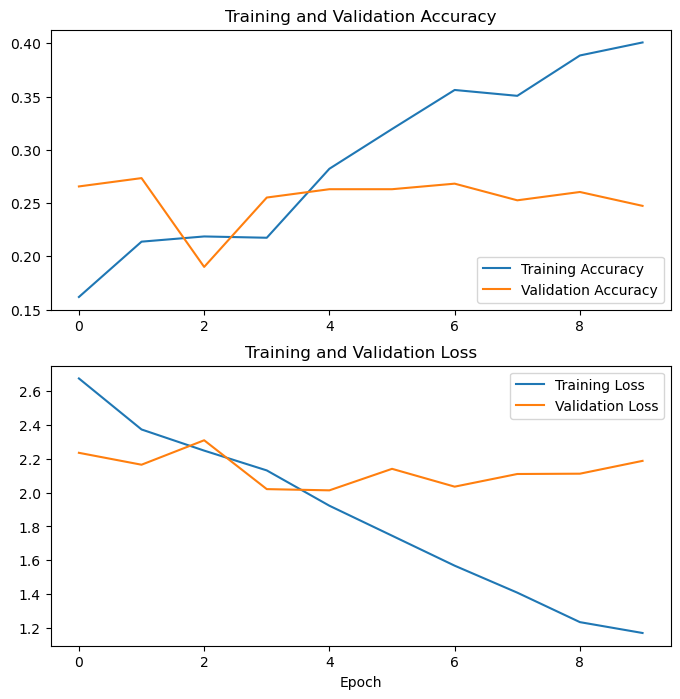

In [8]:
# Visualisation des r√©sultats de l'entra√Ænement
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()


üí¨ Remarque :

- Le mod√®le est sous-performant en ce qui concerne la pr√©cision, qui se situe autour de 25-30%. Cela sugg√®re que le mod√®le a du mal √† apprendre efficacement √† partir des donn√©es.

- Apprentissage Stable : Malgr√© la faible pr√©cision, l'am√©lioration constante au fil des √©poques sugg√®re que le mod√®le apprend. La tendance √† la baisse de la perte soutient cela, bien que cela indique qu'il y a une marge significative d'am√©lioration.

- Sous-apprentissage Potentiel : √âtant donn√© la faible pr√©cision et la perte √©lev√©e, le mod√®le pourrait sous-apprendre le jeu de donn√©es. Cela pourrait √™tre d√ª √† une complexit√© de mod√®le insuffisante, √† un temps d'entra√Ænement inad√©quat ou √† une extraction de caract√©ristiques sous-optimale.

- Tendances de Formation et de Validation Proches : Les lignes de formation et de validation pour la pr√©cision et la perte sont relativement proches, ce qui est g√©n√©ralement un bon signe. Cependant, dans ce contexte, cela indique probablement que le mod√®le sous-apprend √©galement sur les deux ensembles de donn√©es.

## 2. Transfert Learning

#### VGG16 model

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Charger le mod√®le pr√©-entra√Æn√© VGG16 avec les poids ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du mod√®le VGG16 pour emp√™cher l'entra√Ænement
for layer in base_model.layers:
    layer.trainable = False

# Ajouter des couches personnalis√©es au mod√®le
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Cr√©er un nouveau mod√®le en sp√©cifiant les entr√©es et les sorties
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Compiler le mod√®le avec un optimiseur Adam
model_transfer.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Afficher le r√©sum√© du mod√®le
model_transfer.summary()

# Entra√Æner le mod√®le avec les donn√©es d'entra√Ænement
history_transfer = model_transfer.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du mod√®le transf√©r√©
val_loss_transfer, val_acc_transfer = model_transfer.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss_transfer}, Validation accuracy: {val_acc_transfer}')




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

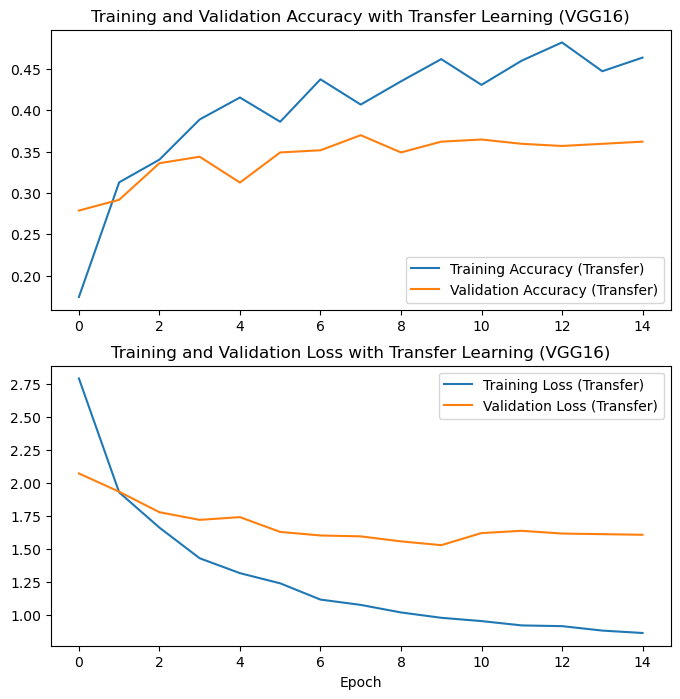

In [10]:
# Visualisation des r√©sultats de l'entra√Ænement avec transfert d'apprentissage
acc_transfer = history_transfer.history['accuracy']
val_acc_transfer = history_transfer.history['val_accuracy']
loss_transfer = history_transfer.history['loss']
val_loss_transfer = history_transfer.history['val_loss']

epochs_transfer = range(len(acc_transfer))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer, acc_transfer, label='Training Accuracy (Transfer)')
plt.plot(epochs_transfer, val_acc_transfer, label='Validation Accuracy (Transfer)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (VGG16)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer, loss_transfer, label='Training Loss (Transfer)')
plt.plot(epochs_transfer, val_loss_transfer, label='Validation Loss (Transfer)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (VGG16)')
plt.xlabel('Epoch')
plt.show()

### Comparaison des performances des deux mod√®les

12/12 [==============================] - 1s 80ms/step - loss: 2.0315 - accuracy: 0.2682
Validation loss (Scratch): 2.031540632247925, Validation accuracy (Scratch): 0.2682291567325592
12/12 [==============================] - 21s 2s/step - loss: 1.5665 - accuracy: 0.3594
Validation loss (Transfer): 1.566451072692871, Validation accuracy (Transfer): 0.359375


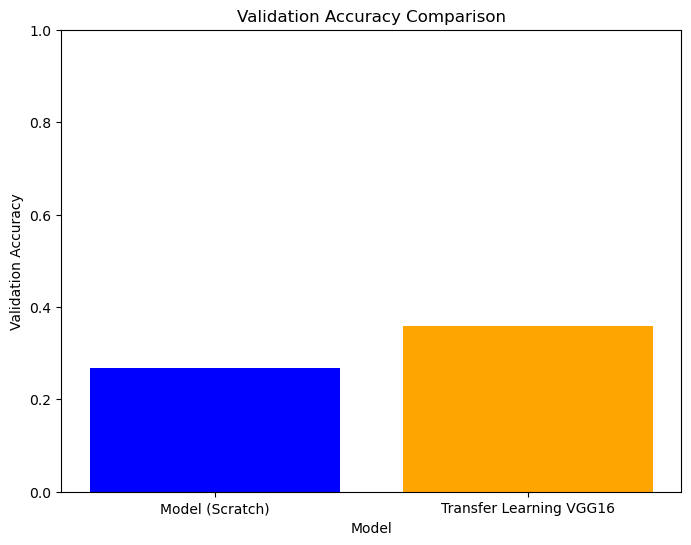

In [11]:
# Evaluation du mod√®le entra√Æn√© √† partir de z√©ro
val_loss_scratch, val_acc_scratch = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Scratch): {val_loss_scratch}, Validation accuracy (Scratch): {val_acc_scratch}')

# Evaluation du mod√®le transf√©r√©
val_loss_transfer, val_acc_transfer = model_transfer.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Transfer): {val_loss_transfer}, Validation accuracy (Transfer): {val_acc_transfer}')

# Visualisation des r√©sultats de comparaison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning VGG16'], [val_acc_scratch, val_acc_transfer], color=['blue', 'orange'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()


#### ResNet50 model

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# Charger le mod√®le pr√©-entra√Æn√© ResNet50 avec les poids ImageNet
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Geler les couches du mod√®le ResNet50 pour emp√™cher l'entra√Ænement
for layer in base_model_resnet.layers:
    layer.trainable = False

# Ajouter des couches personnalis√©es au mod√®le ResNet50
x_resnet = Flatten()(base_model_resnet.output)
x_resnet = Dense(512, activation='relu')(x_resnet)
x_resnet = Dropout(0.5)(x_resnet)
predictions_resnet = Dense(len(train_generator.class_indices), activation='softmax')(x_resnet)

# Cr√©er un nouveau mod√®le en sp√©cifiant les entr√©es et les sorties
model_transfer_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

# Compiler le mod√®le avec un optimiseur Adam
model_transfer_resnet.compile(optimizer=Adam(),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

# Entra√Æner le mod√®le avec les donn√©es d'entra√Ænement
history_transfer_resnet = model_transfer_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 60s 1s/step - loss: 3.8257 - accuracy: 0.0959 - val_loss: 2.7286 - val_accuracy: 0.1328
Epoch 2/50
52/52 [==============================] - 54s 1s/step - loss: 2.8468 - accuracy: 0.1069 - val_loss: 2.6196 - val_accuracy: 0.1380
Epoch 3/50
52/52 [==============================] - 59s 1s/step - loss: 2.7630 - accuracy: 0.1210 - val_loss: 2.5741 - val_accuracy: 0.1302
Epoch 4/50
52/52 [==============================] - 60s 1s/step - loss: 2.6994 - accuracy: 0.1216 - val_loss: 2.5879 - val_accuracy: 0.1354
Epoch 5/50
52/52 [==============================] - 58s 1s/step - loss: 2.7059 - accuracy: 0.1307 - val_loss: 2.5712 - val_accuracy: 0.1250
Epoch 6/50
52/52 [==============================] - 57s 1s/step - loss: 2.6796 - accuracy: 0.1222 - val_loss: 2.5607 - val_accuracy: 0.1302
Epoch 7/50
52/52 [==============================] - 58s 1s/step - loss: 2.6755 - accuracy: 0.1271 - val_loss: 2.5586 - val_accuracy: 0.1302
Epoch 8/50
52/52 [==

12/12 [==============================] - 9s 776ms/step - loss: 2.5532 - accuracy: 0.1328
Validation loss (ResNet50): 2.553178548812866, Validation accuracy (ResNet50): 0.1328125


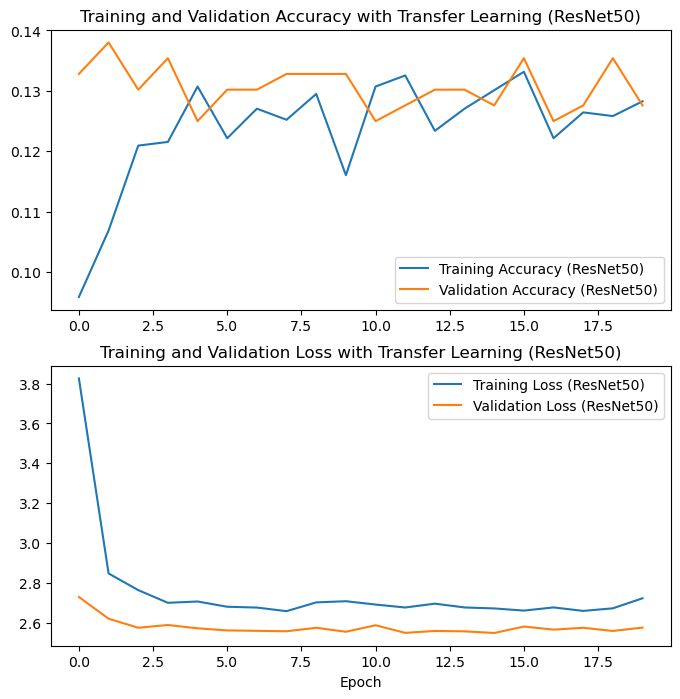

In [13]:

# Evaluation du mod√®le transf√©r√© ResNet50
val_loss_transfer_resnet, val_acc_transfer_resnet = model_transfer_resnet.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (ResNet50): {val_loss_transfer_resnet}, Validation accuracy (ResNet50): {val_acc_transfer_resnet}')

# Visualisation des r√©sultats de l'entra√Ænement avec transfert d'apprentissage ResNet50
acc_transfer_resnet = history_transfer_resnet.history['accuracy']
val_acc_transfer_resnet = history_transfer_resnet.history['val_accuracy']
loss_transfer_resnet = history_transfer_resnet.history['loss']
val_loss_transfer_resnet = history_transfer_resnet.history['val_loss']

epochs_transfer_resnet = range(len(acc_transfer_resnet))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_resnet, acc_transfer_resnet, label='Training Accuracy (ResNet50)')
plt.plot(epochs_transfer_resnet, val_acc_transfer_resnet, label='Validation Accuracy (ResNet50)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (ResNet50)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_resnet, loss_transfer_resnet, label='Training Loss (ResNet50)')
plt.plot(epochs_transfer_resnet, val_loss_transfer_resnet, label='Validation Loss (ResNet50)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (ResNet50)')
plt.xlabel('Epoch')
plt.show()

### Comparaison

12/12 [==============================] - 1s 85ms/step - loss: 2.0004 - accuracy: 0.2656
Validation loss (Scratch): 2.000386953353882, Validation accuracy (Scratch): 0.265625
12/12 [==============================] - 10s 796ms/step - loss: 2.5494 - accuracy: 0.1250
Validation loss (Transfer): 2.5494396686553955, Validation accuracy (Transfer): 0.125


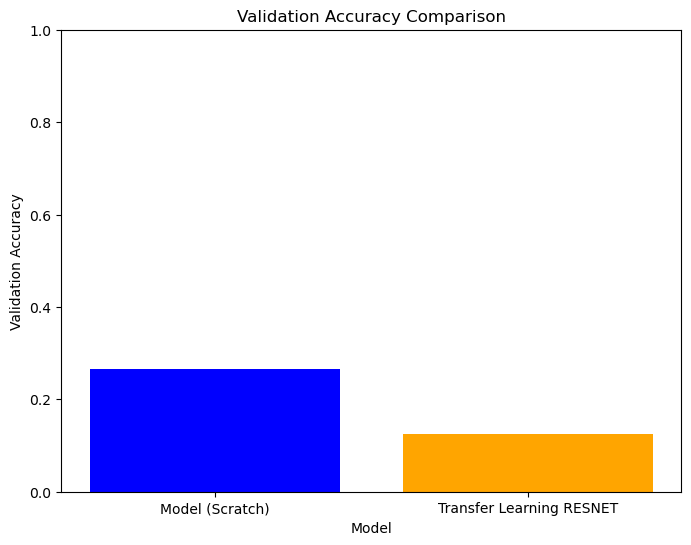

In [14]:
# Evaluation du mod√®le entra√Æn√© √† partir de z√©ro
val_loss_scratch, val_acc_scratch = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Scratch): {val_loss_scratch}, Validation accuracy (Scratch): {val_acc_scratch}')

# Evaluation du mod√®le transf√©r√©
val_loss_transfer, val_acc_transfer = model_transfer_resnet.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss (Transfer): {val_loss_transfer}, Validation accuracy (Transfer): {val_acc_transfer}')

# Visualisation des r√©sultats de comparaison
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning RESNET'], [val_acc_scratch, val_acc_transfer], color=['blue', 'orange'])
plt.title('Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.show()


#### InceptionV3 model

In [15]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 pre-trained model with ImageNet weights
base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the InceptionV3 model
for layer in base_model_inception.layers:
    layer.trainable = False

# Add custom layers to the InceptionV3 base model
x_inception = Flatten()(base_model_inception.output)
x_inception = Dense(512, activation='relu')(x_inception)
x_inception = Dropout(0.5)(x_inception)
predictions_inception = Dense(len(train_generator.class_indices), activation='softmax')(x_inception)

# Create the full model
model_inception = Model(inputs=base_model_inception.input, outputs=predictions_inception)

# Compile the InceptionV3 model
model_inception.compile(optimizer=Adam(),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Train the InceptionV3 model
history_inception = model_inception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 31s 505ms/step - loss: 9.9838 - accuracy: 0.1833 - val_loss: 2.3153 - val_accuracy: 0.2344
Epoch 2/50
52/52 [==============================] - 26s 504ms/step - loss: 2.4037 - accuracy: 0.2254 - val_loss: 1.8713 - val_accuracy: 0.3151
Epoch 3/50
52/52 [==============================] - 26s 499ms/step - loss: 1.9330 - accuracy: 0.3085 - val_loss: 1.8115 - val_accuracy: 0.3203
Epoch 4/50
52/52 [==============================] - 26s 497ms/step - loss: 1.6531 - accuracy: 0.3366 - val_loss: 1.7304 - val_accuracy: 0.3307
Epoch 5/50
52/52 [==============================] - 25s 479ms/step - loss: 1.5488 - accuracy: 0.3513 - val_loss: 1.7640 - val_accuracy: 0.3359
Epoch 6/50
52/52 [==============================] - 26s 492ms/step - loss: 1.4618 - accuracy: 0.3775 - val_loss: 1.7755 - val_accuracy: 0.3229
Epoch 7/50
52/52 [==============================] - 27s 515ms/step - loss: 1.3807 - accuracy: 0.3458 - val_loss: 1.6738 - val_accuracy: 0.3490

12/12 [==============================] - 4s 362ms/step - loss: 1.6917 - accuracy: 0.3411
Validation loss (InceptionV3): 1.6916953325271606, Validation accuracy (InceptionV3): 0.3411458432674408


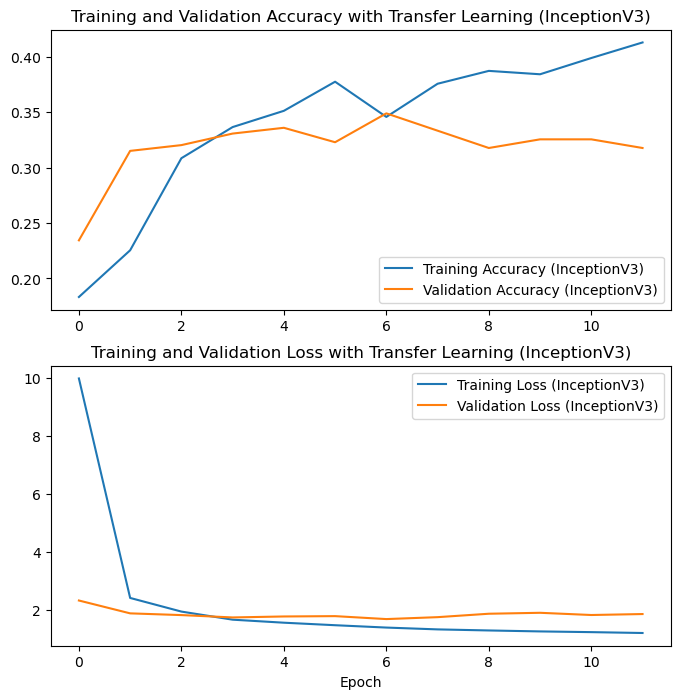

In [16]:
# Evaluation of the InceptionV3 transferred model
val_loss_transfer_inception, val_acc_transfer_inception = model_inception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)
print(f'Validation loss (InceptionV3): {val_loss_transfer_inception}, Validation accuracy (InceptionV3): {val_acc_transfer_inception}')

# Visualization of the training results with InceptionV3 transfer learning
acc_transfer_inception = history_inception.history['accuracy']
val_acc_transfer_inception = history_inception.history['val_accuracy']
loss_transfer_inception = history_inception.history['loss']
val_loss_transfer_inception = history_inception.history['val_loss']

epochs_transfer_inception = range(len(acc_transfer_inception))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_inception, acc_transfer_inception, label='Training Accuracy (InceptionV3)')
plt.plot(epochs_transfer_inception, val_acc_transfer_inception, label='Validation Accuracy (InceptionV3)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (InceptionV3)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_inception, loss_transfer_inception, label='Training Loss (InceptionV3)')
plt.plot(epochs_transfer_inception, val_loss_transfer_inception, label='Validation Loss (InceptionV3)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (InceptionV3)')
plt.xlabel('Epoch')
plt.show()


### Comparaison

12/12 [==============================] - 4s 357ms/step - loss: 1.6353 - accuracy: 0.3542


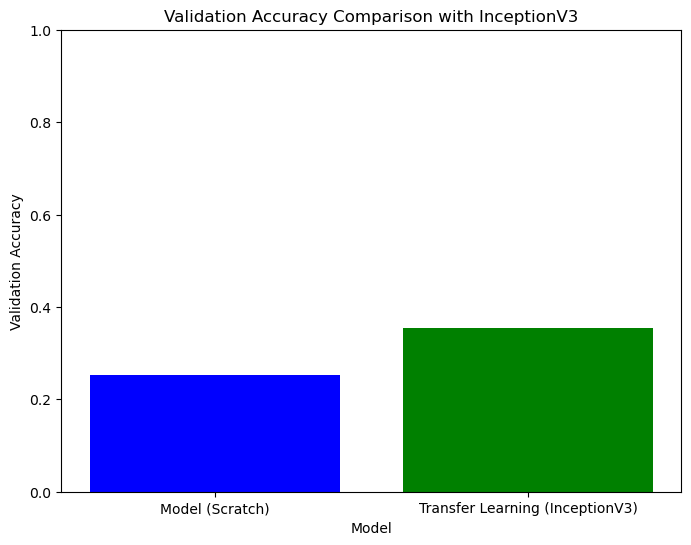

In [17]:
val_loss_scratch, val_acc_scratch = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
val_loss_transfer_inception, val_acc_transfer_inception = model_inception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)

#Visualization of comparison results for InceptionV3
plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning (InceptionV3)'], [val_acc_scratch, val_acc_transfer_inception], color=['blue', 'green'])
plt.title('Validation Accuracy Comparison with InceptionV3')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)  
plt.show()

#### Xception model

In [18]:
from tensorflow.keras.applications import Xception

# Load the Xception pre-trained model with ImageNet weights
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the Xception model
for layer in base_model_xception.layers:
    layer.trainable = False

# Add custom layers to the Xception base model
x_xception = Flatten()(base_model_xception.output)
x_xception = Dense(512, activation='relu')(x_xception)
x_xception = Dropout(0.5)(x_xception)
predictions_xception = Dense(len(train_generator.class_indices), activation='softmax')(x_xception)

# Create the full model
model_xception = Model(inputs=base_model_xception.input, outputs=predictions_xception)

# Compile the Xception model
model_xception.compile(optimizer=Adam(),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the Xception model
history_xception = model_xception.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/50
52/52 [==============================] - 63s 1s/step - loss: 7.9139 - accuracy: 0.1949 - val_loss: 2.1729 - val_accuracy: 0.2891
Epoch 2/50
52/52 [==============================] - 56s 1s/step - loss: 2.1153 - accuracy: 0.2938 - val_loss: 1.8926 - val_accuracy: 0.3177
Epoch 3/50
52/52 [==============================] - 60s 1s/step - loss: 1.7419 - accuracy: 0.3464 - val_loss: 1.7496 - val_accuracy: 0.3385
Epoch 4/50
52/52 [==============================] - 72s 1s/step - loss: 1.5304 - accuracy: 0.3494 - val_loss: 1.7221 - val_accuracy: 0.3359
Epoch 5/50
52/52 [==============================] - 71s 1s/step - loss: 1.4175 - accuracy: 0.3763 - val_loss: 1.7507 - val_accuracy: 0.3021
Epoch 6/50
52/52 [==============================] - 71s 1s/step - loss: 1.2979 - accuracy: 0.3989 - val_loss: 1.6814 - val_accuracy: 0.3724
Epoch 7/50
52/52 [==============================] - 59s 1s/step - loss: 1.2019 - accuracy: 0.4203 - val_loss: 1.7405 - val_accuracy: 0.3385
Epoch 8/50
52/52 [==

12/12 [==============================] - 9s 740ms/step - loss: 1.6862 - accuracy: 0.3385
Validation loss (Xception): 1.6861587762832642, Validation accuracy (Xception): 0.3385416567325592


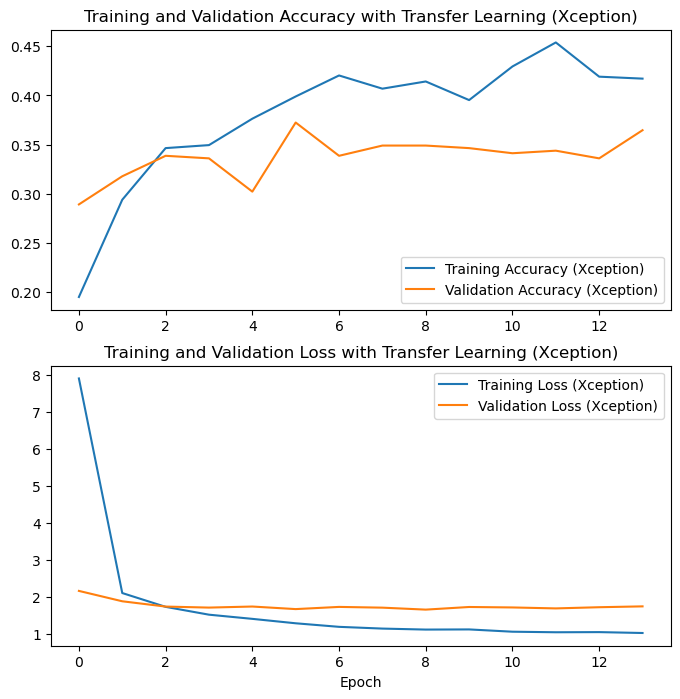

In [19]:
# Evaluation of the Xception transferred model
val_loss_transfer_xception, val_acc_transfer_xception = model_xception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)
print(f'Validation loss (Xception): {val_loss_transfer_xception}, Validation accuracy (Xception): {val_acc_transfer_xception}')

# Visualization of the training results with Xception transfer learning
acc_transfer_xception = history_xception.history['accuracy']
val_acc_transfer_xception = history_xception.history['val_accuracy']
loss_transfer_xception = history_xception.history['loss']
val_loss_transfer_xception = history_xception.history['val_loss']

epochs_transfer_xception = range(len(acc_transfer_xception))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_transfer_xception, acc_transfer_xception, label='Training Accuracy (Xception)')
plt.plot(epochs_transfer_xception, val_acc_transfer_xception, label='Validation Accuracy (Xception)')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy with Transfer Learning (Xception)')

plt.subplot(2, 1, 2)
plt.plot(epochs_transfer_xception, loss_transfer_xception, label='Training Loss (Xception)')
plt.plot(epochs_transfer_xception, val_loss_transfer_xception, label='Validation Loss (Xception)')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss with Transfer Learning (Xception)')
plt.xlabel('Epoch')
plt.show()


### Comparaison

12/12 [==============================] - 8s 691ms/step - loss: 1.7066 - accuracy: 0.3411


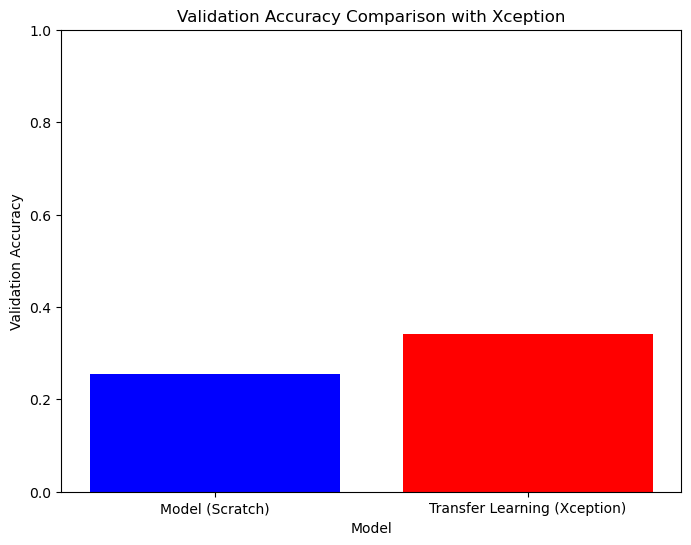

In [20]:
val_loss_scratch, val_acc_scratch = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)



# Apr√®s avoir entra√Æn√© le mod√®le Xception avec transfert d'apprentissage
val_loss_transfer_xception, val_acc_transfer_xception = model_xception.evaluate(
    validation_generator, 
    steps=validation_generator.samples // validation_generator.batch_size
)


# Visualization of comparison results for Xception
plt.figure(figsize=(8, 6))
plt.bar(['Model (Scratch)', 'Transfer Learning (Xception)'], [val_acc_scratch, val_acc_transfer_xception], color=['blue', 'red'])
plt.title('Validation Accuracy Comparison with Xception')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)  # Make sure the y-axis starts at 0 and ends at 1 for consistency
plt.show()


## 3. Data Augmentation

In [21]:
#  Pr√©paration des donn√©es pour l'entra√Ænement
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemin vers le dossier contenant les images cropp√©es
base_dir = 'cropped_train_images'

# Cr√©ation des g√©n√©rateurs d'images avec augmentation de donn√©es pour l'entra√Ænement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Utilisation de 20% des donn√©es pour la validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images apr√®s redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='training')  # D√©fini pour l'entra√Ænement

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Taille des images apr√®s redimensionnement
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # D√©fini pour la validation

Found 1669 images belonging to 26 classes.
Found 406 images belonging to 26 classes.


In [22]:
# D√©finition du mod√®le CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# D√©finir le mod√®le (la derni√®re couche correspond au nombre de classes)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compiler le mod√®le
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le r√©sum√© du mod√®le
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_101 (Conv2D)         (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_103 (Conv2D)         (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
# Entra√Ænement du mod√®le
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

# Evaluation du mod√®le

val_loss, val_acc = model.evaluate(validation_generator,
                                   steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation loss: {val_loss}, Validation accuracy: {val_acc}')

üí¨ Remarque et conclusion

**√Ä partir de z√©ro :**

Avantages :
- Contr√¥le complet sur l'architecture.
- Aucune d√©pendance vis-√†-vis des mod√®les pr√©existants, ce qui peut √™tre b√©n√©fique si les donn√©es sont tr√®s diff√©rentes d'ImageNet.

Inconv√©nients :
- N√©cessite plus de donn√©es pour bien g√©n√©raliser.
- Temps d'entra√Ænement plus longs.
- Souvent, cela aboutit √† une pr√©cision inf√©rieure par rapport √† l'apprentissage par transfert, en particulier avec de petits ensembles de donn√©es.

**Apprentissage par transfert avec VGG16 :**

Avantages :
- B√©n√©ficie des poids pr√©-entra√Æn√©s sur ImageNet, ce qui aide √† la convergence.
- Bon pour apprendre des caract√©ristiques √† partir d'images qui sont quelque peu similaires √† ImageNet.
    
Inconv√©nients :
- R√©seau tr√®s profond avec de nombreux param√®tres, ce qui le rend gourmand en calcul.
- Tend √† √™tre plus lent que d'autres mod√®les comme ResNet ou Inception en raison de sa profondeur.

**Apprentissage par transfert avec ResNet50 :**

Avantages :

- Utilise des connexions r√©siduelles pour permettre l'entra√Ænement de r√©seaux tr√®s profonds sans d√©gradation.
- Convergence g√©n√©ralement plus rapide par rapport √† VGG16 gr√¢ce aux connexions de saut.

Inconv√©nients :
- Peut √™tre excessif pour des t√¢ches simples ou des ensembles de donn√©es tr√®s petits.

**Apprentissage par transfert avec InceptionV3 :**

Avantages :
- Utilise un m√©lange de tailles de filtres pour capturer des informations √† diverses √©chelles.
- Plus efficace en termes de param√®tres que VGG16.
    
Inconv√©nients :
- Une architecture plus complexe peut √™tre plus difficile √† adapter √† de nouvelles t√¢ches.
- Parfois plus lent √† entra√Æner en raison de la complexit√© des modules d'inception.

**Apprentissage par transfert avec Xception :**

Avantages :
- Utilise des convolutions s√©parables en profondeur, qui peuvent √™tre plus efficaces que les convolutions traditionnelles.
- Atteint souvent une pr√©cision plus √©lev√©e sur les ensembles de donn√©es de r√©f√©rence.

Inconv√©nients :
- Peut n√©cessiter plus de r√©glages fins pour adapter les poids pr√©-entra√Æn√©s √† une nouvelle t√¢che.
- Peut toujours √™tre gourmand en calcul malgr√© l'efficacit√© de ses convolutions.
